In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import numpy as np
import os
import shutil
np.random.seed(0)

files = glob.glob('/content/drive/MyDrive/BUS_binary/*')

benign_files = [fn for fn in files if 'benign' in fn]
malignant_files = [fn for fn in files if 'malignant' in fn]
len(benign_files), len(malignant_files)

(1775, 931)

In [3]:
benign_train = np.random.choice(benign_files, size=1598, replace=False)
malignant_train = np.random.choice(malignant_files, size=838, replace=False)
benign_test = list(set(benign_files) - set(benign_train))#
malignant_test = list(set(malignant_files) - set(malignant_train))#

benign_val = np.random.choice(benign_train, size=320, replace=False)
malignant_val = np.random.choice(malignant_train, size=168, replace=False)
benign_train = list(set(benign_train) - set(benign_val))
malignant_train = list(set(malignant_train) - set(malignant_val))

print(len(benign_train),len(malignant_train),len(benign_val),len(malignant_val),len(benign_test),len(malignant_test))

1278 670 320 168 177 93


In [4]:
train_dir = '/content/drive/MyDrive/DATASET_BUS_BINARY/training_data'
val_dir = '/content/drive/MyDrive/DATASET_BUS_BINARY/validation_data'
test_dir = '/content/drive/MyDrive/DATASET_BUS_BINARY/test_data'
import shutil
train_files = np.concatenate([benign_train, malignant_train])
validate_files = np.concatenate([benign_val, malignant_val])
test_files = np.concatenate([benign_test, malignant_test])

shutil.rmtree('/content/drive/MyDrive/DATASET_BUS_BINARY/training_data',ignore_errors=True)
shutil.rmtree('/content/drive/MyDrive/DATASET_BUS_BINARY/validation_data',ignore_errors=True)
shutil.rmtree('/content/drive/MyDrive/DATASET_BUS_BINARY/test_data',ignore_errors=True)
##
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)

In [5]:
files_tr = glob.glob('/content/drive/MyDrive/DATASET_BUS_BINARY/training_data/*')
files_vd = glob.glob('/content/drive/MyDrive/DATASET_BUS_BINARY/validation_data/*')
files_tt = glob.glob('/content/drive/MyDrive/DATASET_BUS_BINARY/test_data/*')
files_tr_benign = [fn for fn in files_tr if 'benign' in fn]
files_tr_malignant = [fn for fn in files_tr if 'malignant' in fn]

files_vd_benign = [fn for fn in files_vd if 'benign' in fn]
files_vd_malignant = [fn for fn in files_vd if 'malignant' in fn]

files_tt_benign = [fn for fn in files_tt if 'benign' in fn]
files_tt_malignant = [fn for fn in files_tt if 'malignant' in fn]
print('Files_tr:',len(files_tr_benign), len(files_tr_malignant))
print('Files_vd:',len(files_vd_benign), len(files_vd_malignant))
print('Files_tt:',len(files_tt_benign), len(files_tt_malignant))

Files_tr: 1278 670
Files_vd: 320 168
Files_tt: 177 93


PREPARING DATASET

In [6]:
import glob
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
IMG_DIM = (224,224)

train_files = glob.glob('/content/drive/MyDrive/DATASET_BUS_BINARY/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('/content/drive/MyDrive/DATASET_BUS_BINARY/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in validation_files]

test_files = glob.glob('/content/drive/MyDrive/DATASET_BUS_BINARY/test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in test_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape,'\tTest dataset shape:', test_imgs.shape)

Train dataset shape: (1948, 224, 224, 3) 	Validation dataset shape: (488, 224, 224, 3) 	Test dataset shape: (270, 224, 224, 3)


(224, 224, 3)


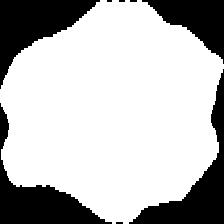

In [7]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
test_imgs_scaled =test_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255
test_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [8]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (224, 224, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
test_labels_enc = le.transform(test_labels)

print(train_labels[25:30], train_labels_enc[25:30], test_labels_enc[25:30])

['benign', 'benign', 'benign', 'benign', 'benign'] [0 0 0 0 0] [0 0 0 0 0]


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=20,
                                   width_shift_range=0, height_shift_range=0, shear_range=0, 
                                   horizontal_flip=True, fill_mode='constant')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['benign', 'benign', 'benign', 'benign', 'benign']


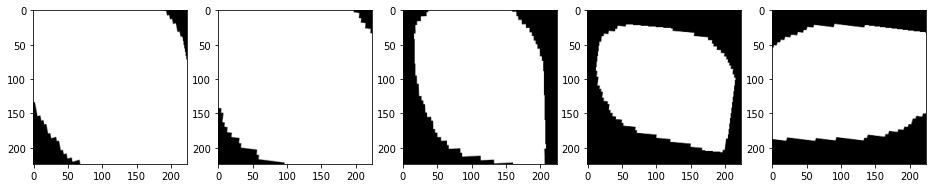

In [10]:
img_id = 6
bening_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
bening = [next(bening_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in bening])
l = [ax[i].imshow(bening[i][0][0]) for i in range(0,5)]

Labels: ['malignant', 'malignant', 'malignant', 'malignant', 'malignant']


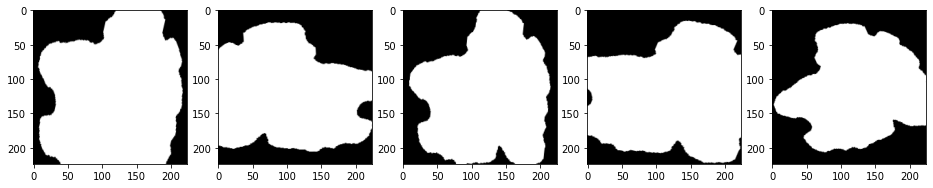

In [11]:
img_id = 1500
malignant_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
malignant = [next(malignant_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in malignant])
l = [ax[i].imshow(malignant[i][0][0]) for i in range(0,5)]

In [12]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
test_generator = test_datagen.flow(test_imgs, test_labels_enc, batch_size=20)
input_shape = (224, 224, 3)
TRAIN_STEPS_PER_EPOCH = np.ceil((len(train_imgs)/30)-1)
# to ensure that there are enough images for training bahch
VAL_STEPS_PER_EPOCH = np.ceil((len(validation_imgs)/20)-1)
print(TRAIN_STEPS_PER_EPOCH,VAL_STEPS_PER_EPOCH)

64.0 24.0


---------------------------------------------

In [13]:
import keras
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
##
from keras.models import Model
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D, Input

base_model = keras.applications.ResNet101V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
print("Number of layers in the base model: ", len(base_model.layers))

171319296/171317808 [==============================] - 2s 0us/step
Number of layers in the base model:  377


In [14]:
for layer in base_model.layers[0:283]:
  layer.trainable = False
 
for layer in base_model.layers[283:]:
  layer.trainable = True

In [15]:
inputs = keras.Input(input_shape)
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
x = keras.layers.Dense(2048, activation = 'relu')(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x) #Output layer
model = keras.Model(inputs, outputs)
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 47,085,313
Trainable params: 25,283,841
Non-trainable params: 21,801,472
________________________________________

In [16]:
import tensorflow_datasets as tfds
import pathlib
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import time
from keras.models import load_model
base_model.compile(loss='binary_crossentropy',
                  optimizer= 'adam',
                  metrics=['accuracy'])
tic=time.time()
# training
filepath='/content/drive/MyDrive/MODELOS/resnet101_binary/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
mc = ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
es = [mc]
history = model.fit(
    train_generator, steps_per_epoch=TRAIN_STEPS_PER_EPOCH,  epochs=50,
    validation_data = val_generator, validation_steps=VAL_STEPS_PER_EPOCH, verbose=1,callbacks=[es])
# training
print('Tiempo de procesamiento (secs): ', time.time()-tic)

Epoch 1/50
64/64 [==============================] - 67s 436ms/step - loss: 0.5005 - accuracy: 0.7699 - val_loss: 0.3830 - val_accuracy: 0.8583

Epoch 00001: val_accuracy improved from -inf to 0.85833, saving model to /content/drive/MyDrive/MODELOS/resnet101_binary/weights-improvement-01-0.86.hdf5
Epoch 2/50
64/64 [==============================] - 25s 389ms/step - loss: 0.3751 - accuracy: 0.8469 - val_loss: 0.3091 - val_accuracy: 0.8750

Epoch 00002: val_accuracy improved from 0.85833 to 0.87500, saving model to /content/drive/MyDrive/MODELOS/resnet101_binary/weights-improvement-02-0.88.hdf5
Epoch 3/50
64/64 [==============================] - 25s 387ms/step - loss: 0.3626 - accuracy: 0.8664 - val_loss: 0.3260 - val_accuracy: 0.8667

Epoch 00003: val_accuracy did not improve from 0.87500
Epoch 4/50
64/64 [==============================] - 24s 377ms/step - loss: 0.3601 - accuracy: 0.8624 - val_loss: 0.3853 - val_accuracy: 0.8562

Epoch 00004: val_accuracy did not improve from 0.87500
Epo

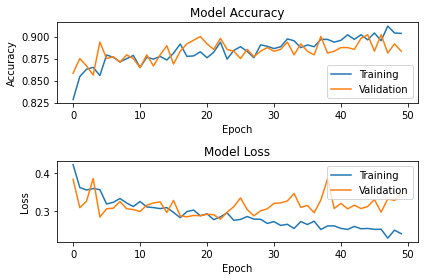

In [17]:

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [ ]:
model.load_weights("/content/drive/MyDrive/MODELOS/resnet101_binary/weights-improvement-28-0.90.hdf5")
scores = model.evaluate(
    test_imgs_scaled,
    test_labels_enc,
    batch_size=64,

    verbose=0,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.37%
